# SAXS&WAXS pipeline for calibrations of beamline parameters, including beam center, det-sam distance etc.


## Overview

* Setup: load packages/setup path
* Load Mask (made at the beamline)
* Check beam center
* Do circulare average to check the det-sam distance
* Export calibration results (mask data, beamline parameters) to a hdf file 
 

### DEV
* V0: Initialize the pipeline (2019/10/26 by YG yuzhang@bnl.gov)
* V1: Develop the pyScatt package (2019/11/6 by YG yuzhang@bnl.gov 
* V2: Develop make mask and check beam center using a qphi-analysis 
<br> $\;\;\;\;$   Develop the create mask option to make circle, rotated_line shapes 
<br> $\;\;\;\;$   Develop the qphi analysis to check the beam center
* V3: Develop automatically search beam center
* V4: Add more controls/functions for the creation of mask
* V5: use pyFAI detector class for create mask
      

## TODLIST
* 



In [1]:
%matplotlib notebook
from pyScatt.packages import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })

plt.rcParams.update({ 'image.interpolation': 'none'   })
 

# WAXS--Setup paths

In [2]:
#inDir =  '/home/group/NSLSII_Data/SMI/2020_Cycle1/AB_CUNNY/AB2_1/'
#inDir = '/home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle3/307961_Dinca/1M/'
#inDir = '/home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle3/309075_SWong2/1M/'
inDir =  '/home/group/NSLSII_Data/SMI/2022_Cycle2/309562_Dinca/1M/'
print('The input dir is: %s'%inDir)


outDir = '/home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle3/Mask/'

create_fullpath(  outDir )

The input dir is: /home/group/NSLSII_Data/SMI/2022_Cycle2/309562_Dinca/1M/
Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle3/Mask/  already exists


'/home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle3/Mask/'

In [4]:
flist = ls_dir( inDir, and_list=[  '' ],or_list=[  '' ], no_list=[ 'test'  ])
flist

array(['Dinca_BTABQ_Na_ON_run3_2022-07-14-20-47-29_x28900.03_y-6299.97_z4002.14_det5000.0_waxs40.00_expt2s_sid00268411_000001_SAXS.tif',
       'Dinca_CuHHTT_multi_V_x29500.01_y-4799.92_z4001.95_det5000.0_waxs40.00_expt1s_sid00268311_000001_SAXS.tif',
       'Dinca_BTABQ_Li_DC_ON_run4_2022-07-13-22-27-07_x28900.02_y-4999.95_z4010.57_det5000.0_waxs40.00_expt2s_sid00267475_000001_SAXS.tif',
       'Dinca_BTABQ_Li_DC_ON_TEST_x27900.01_y-4499.91_z4010.24_det5000.0_waxs40.00_expt1s_sid00267431_000001_SAXS.tif',
       'Dinca_BTABQ_Na_ON_run6_2022-07-14-21-17-18_x28900.03_y-6299.96_z4002.15_det5000.0_waxs40.00_expt2s_sid00268422_000001_SAXS.tif',
       'Dinca_BTABQ_Li_DC_ON_TEST_x27900.04_y-4999.91_z4010.22_det5000.0_waxs40.00_expt1s_sid00267432_000001_SAXS.tif',
       'Dinca_BTABQ_Na_ON_run9_2022-07-14-21-47-09_x28900.04_y-6299.95_z4002.14_det5000.0_waxs40.00_expt2s_sid00268429_000001_SAXS.tif',
       'Dinca_BTABQ_Li_FDC2_x28900.00_y-4500.00_z4000.42_det5000.0_waxs40.00_expt2s_sid0026741

## check one data

In [18]:
#fp  = 'Dinca_Cell04_NH4Cl_Electrolyte_x35800.01_y800.00_z-1500.06_det5000.0_waxs20.00_expt1s_sid00012699_000001_SAXS.tif'


fp = 'Dinca_BTABQ_Na_ON_run3_2022-07-14-20-47-29_x28900.03_y-6299.97_z4002.14_det5000.0_waxs40.00_expt2s_sid00268411_000001_SAXS.tif'
fp = 'Dinca_BTABQ_Na_ON_run9_2022-07-14-21-47-09_x28900.04_y-6299.95_z4002.14_det5000.0_waxs40.00_expt2s_sid00268429_000001_SAXS.tif'
fp = 'Dinca_BTABQ_Na_ON_run43_2022-07-15-03-25-53_x28900.07_y-6299.96_z4002.13_det5000.0_waxs40.00_expt2s_sid00268531_000001_SAXS.tif'
img = get_cms_img( fp, inDir ) [::-1]
img.shape
b_xy = [ 485, 566 ]
b_xy = [ 454, 682  ]


b_xy =  [ 452, 565   ]
 


In [19]:
#fp0 = '_Al_125um_window_x-18008.58_y-4900.29_det6500.0m_expt1s_attNone_sid00135625_000001_SAXS.tif'
#fp0 = '_Al_125um_window_x-18008.57_y-4900.29_det6500.0m_expt0.1s_attNone_sid00135624_000001_SAXS.tif'
#img0 = get_cms_img( fp0, inDir ) [::-1]

In [20]:
img

array([[168, 165, 171, ..., 186, 156, 156],
       [161, 216, 195, ..., 168, 193, 173],
       [178, 159, 197, ..., 161, 181, 189],
       ...,
       [185, 170, 200, ..., 198, 164, 202],
       [178, 198, 199, ..., 194, 181, 195],
       [202, 182, 196, ..., 200, 196, 197]], dtype=int32)

<IPython.core.display.Javascript object>


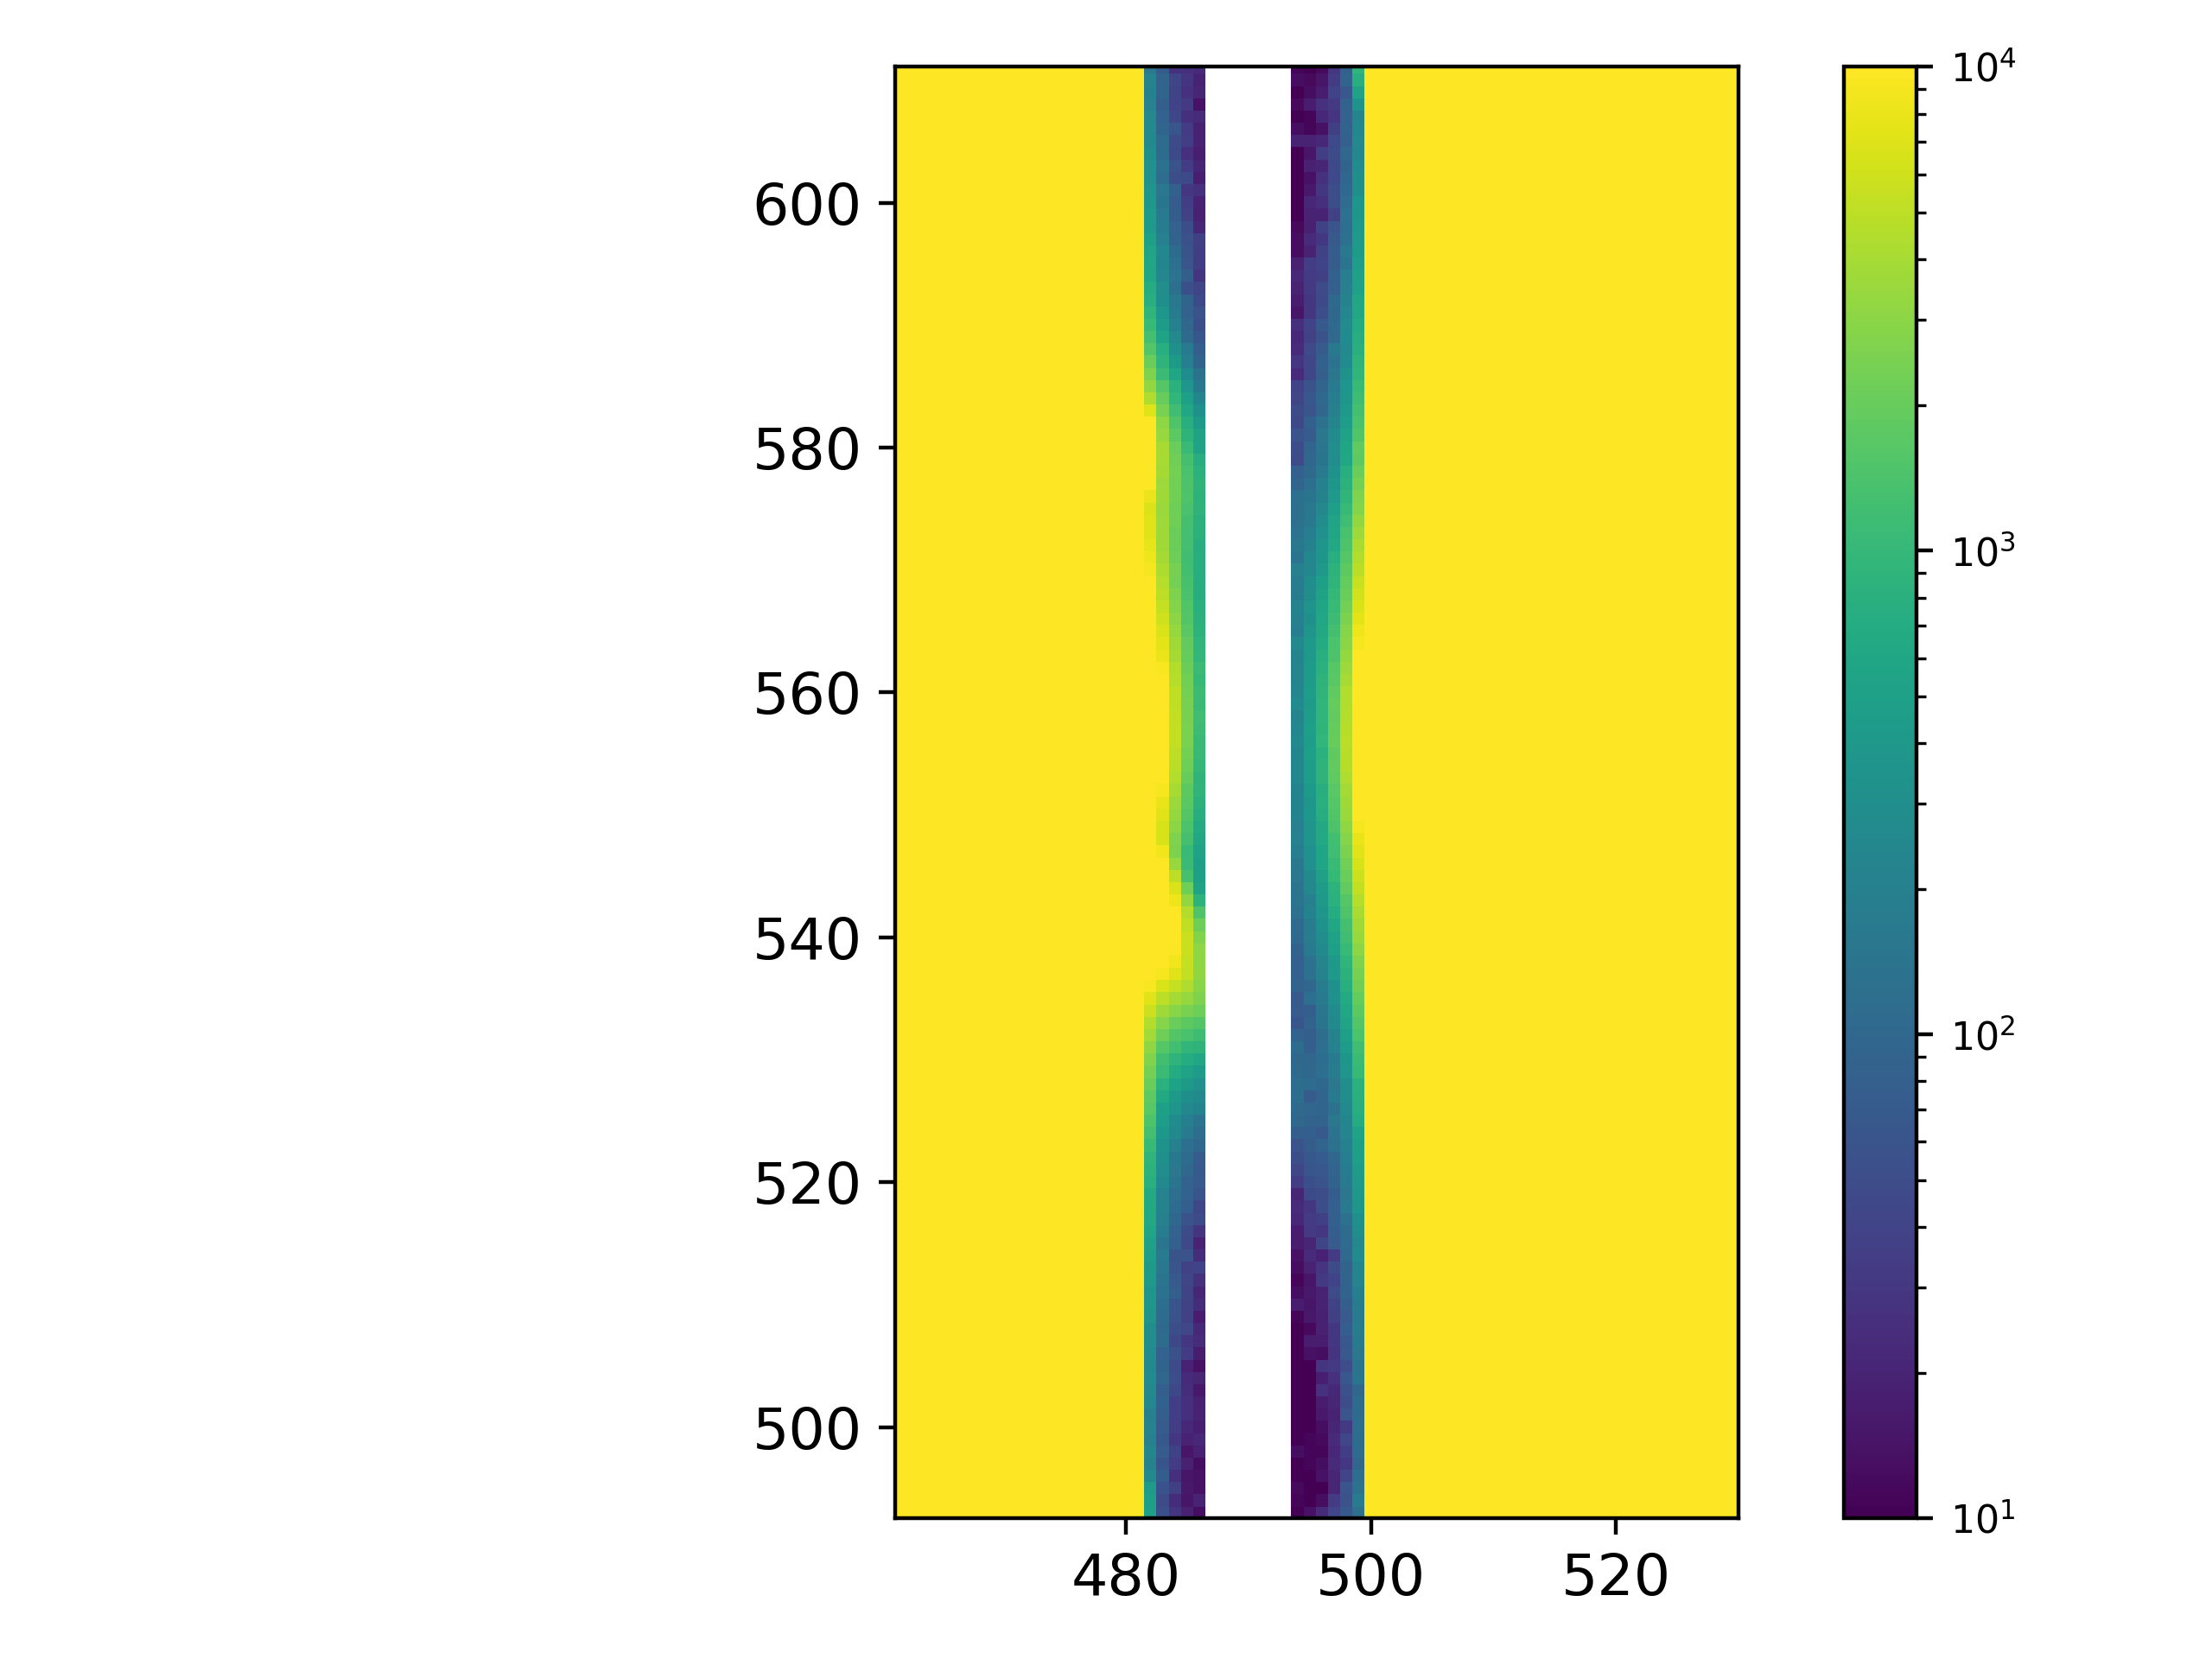

In [23]:
show_img(  img, logs= True, center=b_xy , aspect=1, vmax=1e4, vmin=1e1, show_colorbar=True)

<IPython.core.display.Javascript object>


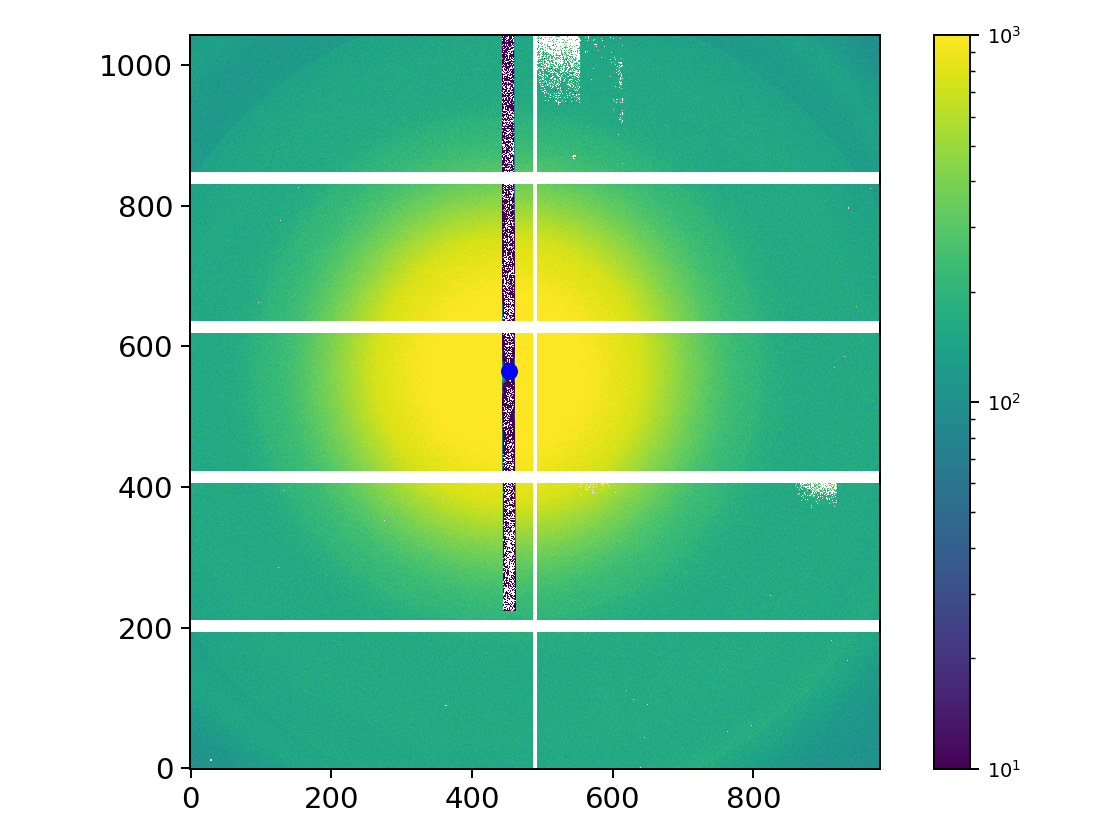

In [22]:
show_img( img , logs=True, center=b_xy , aspect=1, vmax=1e3, vmin=1e1, show_colorbar=True)

In [23]:
b_xy

[452, 565]

In [24]:
#b_xy = [ 487, 561]

In [25]:

r0 = 320 #150
rw = 2
ring = create_ring_mask( img.shape, r1=r0, r2= r0 + rw, center=  b_xy    )
imgc= np.array( img.copy(), dtype=np.float)
imgc[ring] *= 1e6


In [26]:
#show_img(ring)

<IPython.core.display.Javascript object>


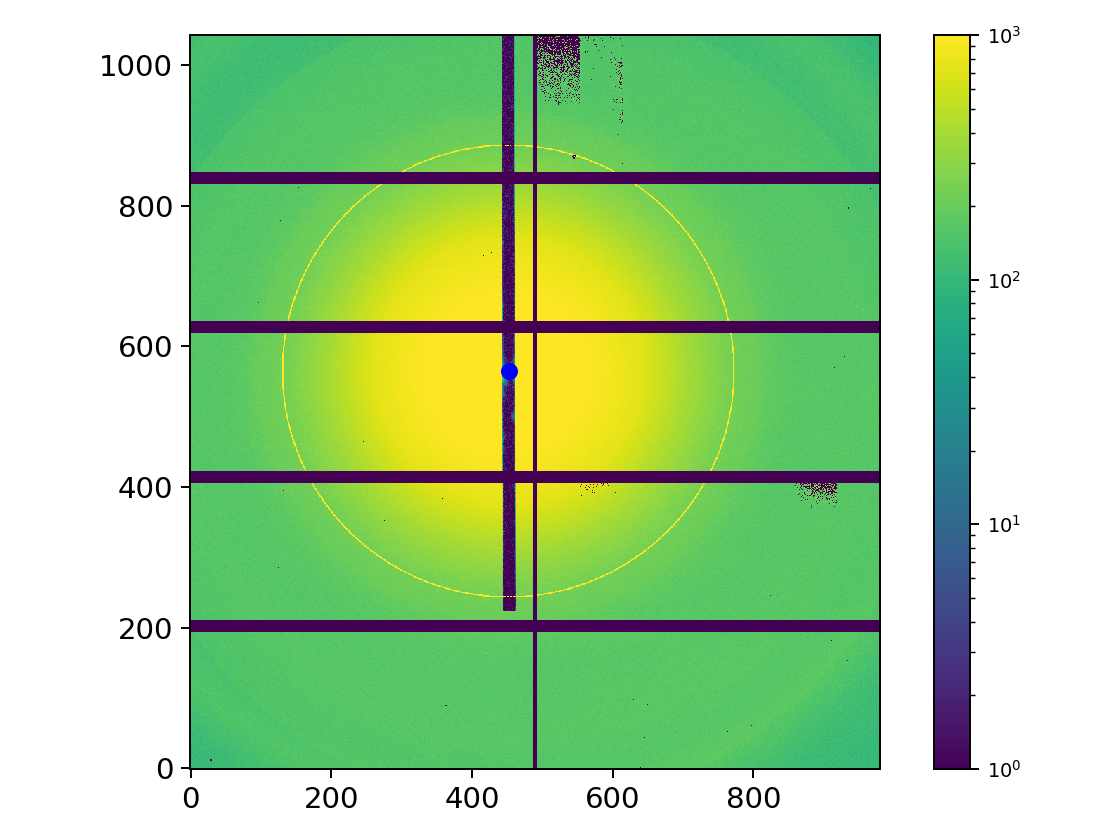

In [27]:
show_img( imgc , logs=True, center=b_xy , aspect=1, vmax=1e3, vmin= 1, show_colorbar=True)

## create mask

In [28]:
%run -i /home/yuzhang/Software/pyScatt/pyScatt/Detectors.py

In [29]:
b_xy

[452, 565]

## get the chip mask

In [36]:
det = get_detector( 'Pilatus1m' )
#maskw = det.calc_mask( bs=[ 454, 540  ], bs_kind =  'pindiode'  )
#maskw = det.calc_mask( bs=[ 454, 336 ], bs_kind =  None  )
maskw = det.calc_mask( bs=[ 452, 220 ], bs_kind =  None  )


<IPython.core.display.Javascript object>


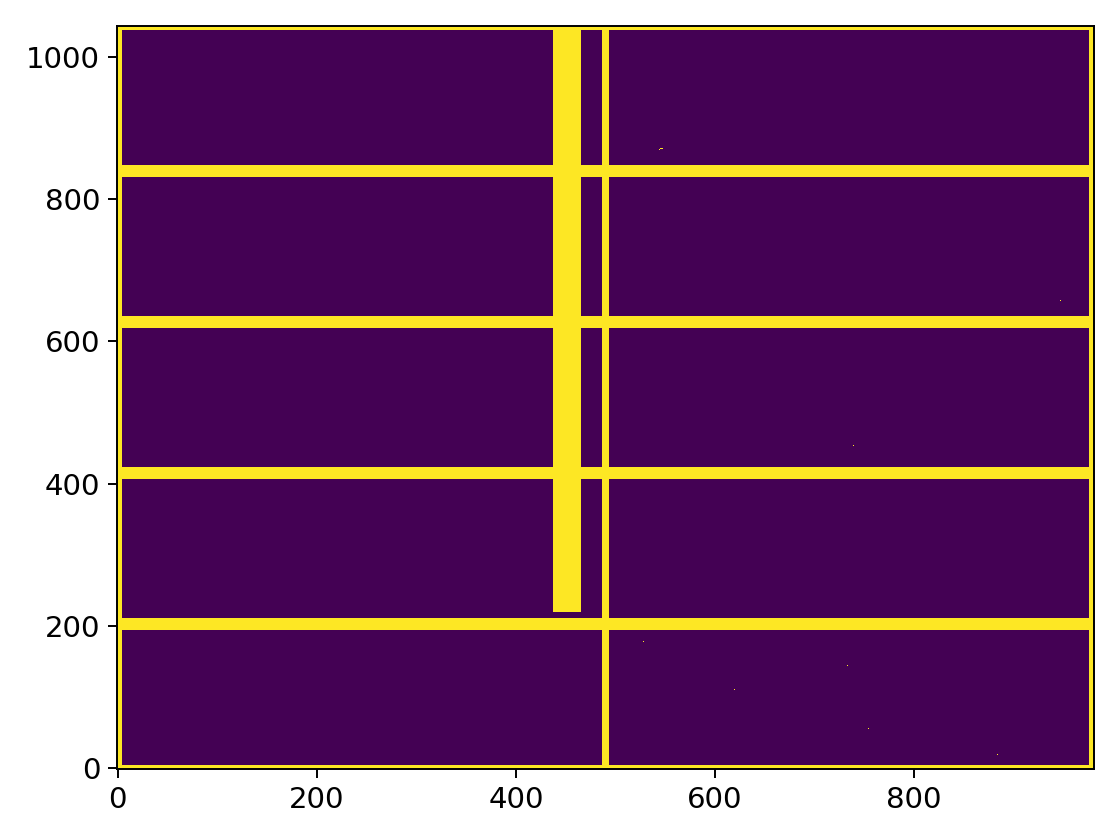

In [37]:
show_img( maskw )

<IPython.core.display.Javascript object>


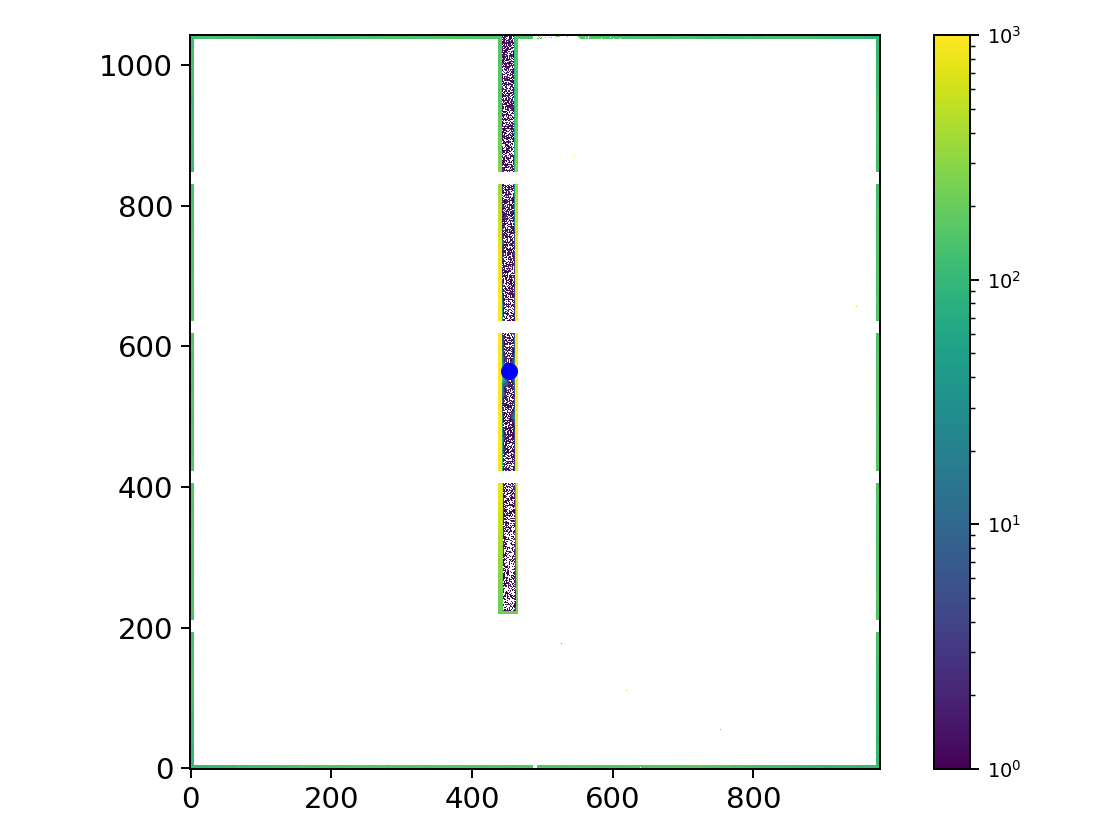

In [39]:
show_img( img *  maskw, logs=True, center= b_xy, aspect=1, vmax=1e3, vmin=1, show_colorbar=True)
 

<IPython.core.display.Javascript object>


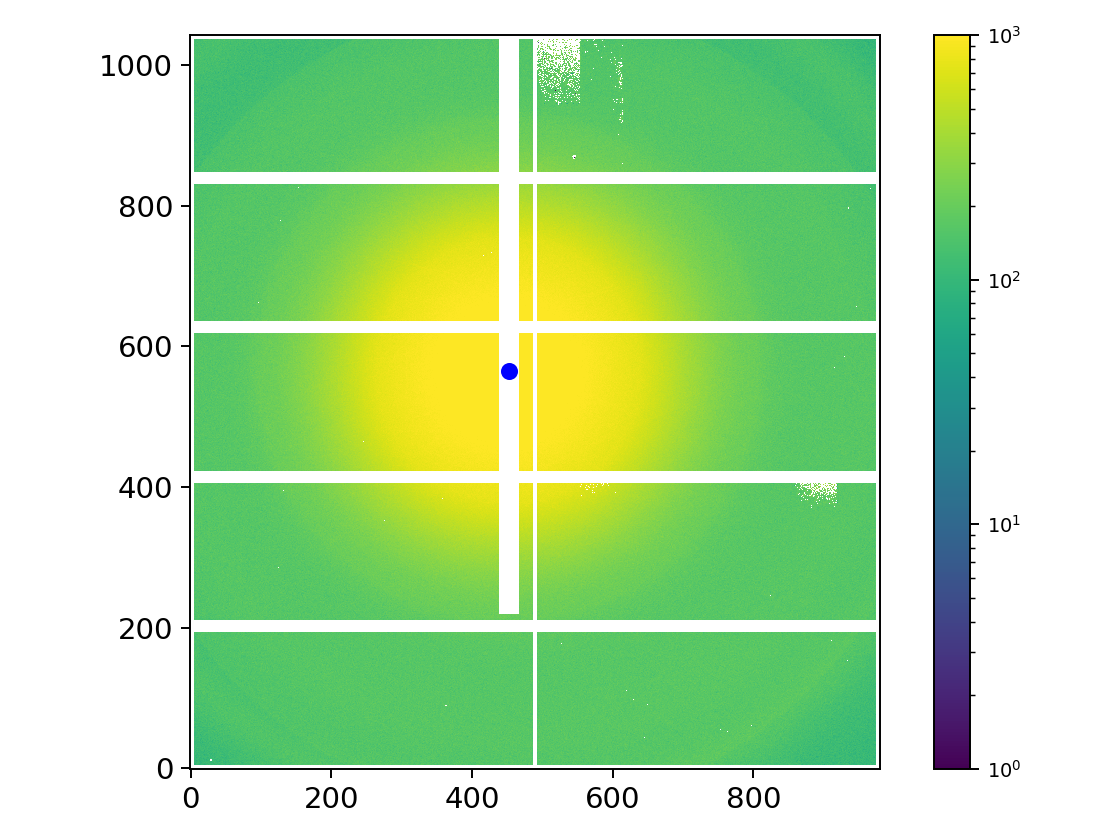

In [33]:
show_img( img *  ~maskw, logs=True, center= b_xy, aspect=1, vmax=1e3, vmin=1, show_colorbar=True)
 

## Save the mask

In [34]:
#fp  = outDir + 'mask_saxs_2021_C3_Nov5000'
fp  = outDir + 'mask_saxs_2021_C3_Nov3000'
np.save(  fp, maskw )
print('The mask is save in %s.npy   .'%fp)
 

The mask is save in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle3/Mask/mask_saxs_2021_C3_Nov3000.npy   .


In [35]:
ls_dir( outDir)

array(['mask_saxs_2021_C3_Sep5000.npy', 'mask_saxs_2021_C3_Sep3000.npy',
       'mask_saxs_2021_C3_Sep.npy', 'mask_waxs900_2021C3_Sep.npy',
       'mask_saxs_2021_C3_Nov5000.npy', 'mask_saxs_2021_C3_Nov3000.npy'],
      dtype='<U29')

In [ ]:
#m = np.load(  outDir + 'mask_waxs_2020C3_SWong.npy')

## Check the beam center by doing cir-avg

In [ ]:
#geometry   ='Reflection'
geometry   = 'Transmission'
wav_m = 1E-10 * (12.398/16.1)
sdd_mm = 6500.00
b_xy = [487, 561]
bs_xy = [ 486+3, 540  ]
incident_angle = 0
det_str = 'Pilatus1m'
hotpixel_thres = 1e6
pargs_sc = dict( wav_m = wav_m, 
                sdd_mm = sdd_mm, 
                b_xy =b_xy, 
                bs_xy = bs_xy, 
                incident_angle = incident_angle,             
                det_str = det_str, 
                bs_kind = None, 
                useqx = True,
                geometry =  geometry,                
                username = 'check', 
                cycle =  'xx', 
                beamline = 'xx', 
                outDir = outDir )

SC = Scattering( pargs_sc  )   
SC.create_ai()

In [ ]:
%run -i /home/yuzhang/Software/pyScatt/pyScatt/Scattering_Functions.py

In [ ]:
SC.load_data( [ inDir + fp ] )  
Prange=None
#Prange= [ -180, -90 ]
#Prange= [0,90 ]
#Prange= [   -40, 0 ]

qw,iqw = SC.img_circular_average(img= img ,Qrange=None,Prange=Prange,
                                 #bins=1500,method='X',mask=maskw)
                                 bins=1500,method='ai', #mask=roi_mask ) 
                                   mask=maskw ) 

qw1,iqw1 = SC.img_circular_average(img=  img0 ,Qrange=None,Prange=Prange,
                                 #bins=1500,method='X',mask=maskw)
                                 bins=1500,method='ai', #mask=roi_mask ) 
                                   mask=maskw ) 

In [ ]:
#show_img( ~maskw )

In [ ]:
%run -i /home/yuzhang/Software/pyScatt/pyScatt/Scattering_Functions.py

In [ ]:
#roi_mask, P_map = get_roiPhi_from_img( img, Prange,center=b_xy, mask=  maskw )
#show_img(  ~roi_mask )
#show_img( P_map, show_colorbar=True )
#show_img( img * ~maskwh, logs=True )
#show_img( img * ~roi_mask, logs=True )

In [ ]:
fig,ax=plt.subplots()

#SC.plot_q_iq( qw1, iqw1, fig_ax=[fig,ax], ls='-', m='', c='r' )
SC.plot_q_iq( qw, iqw, fig_ax=[fig,ax], ls='--', m='o',c='k' )

#SC.plot_q_iq( qw, iqw - iqw1 *.90 , fig_ax=[fig,ax], ls='--', m='o',c='k' )

#SC.plot_q_iq( qw, iqw / iqw1  , fig_ax=[fig,ax], ls='--', m='o',c='k', logy=False )


#ax.vlines( 0.1076 * 2, 0, 1e4)
ax.set_xlim( 0.001, 0.08 )


# SAXS

In [ ]:
#inDir = '/home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/SWong/saxs/raw/'
#outDir = '/home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/SWong/Mask/'

inDir = '/home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Dishari/saxs/raw/'
outDir = '/home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Dishari/Mask/'


create_fullpath(  outDir )

In [ ]:
fp = 'AgBH_cali_5m_13.5kev_th0.000_5.00s_35548_saxs.tiff'
fp = 'AM_Sam_5H_pos1_x0.200_y0.000_T-273.150C_1.00s_35721_saxs.tiff'
fp = 'AM_Sam_5H_pos1_x0.200_y0.000_T-273.150C_30.00s_35690_saxs.tiff'
fp = 'AM_Sam_4H_pos1_x0.200_y-0.200_T-273.150C_30.00s_35693_saxs.tiff'
fp =  'AM_Sam_4H_pos1_x0.200_y-0.500_T-273.150C_30.00s_35701_saxs.tiff'
fp='AM_Sam_1H_pos1_x-0.050_y-0.100_T-273.150C_30.00s_35719_saxs.tiff'

fp = 'AgBH_cali_5m_WAXSx-195_y18_z-115_605.5s_RH1.067_th0.000_10.00s_42204_saxs.tiff'
fp = 'AgBH_cali_5m_saxs_on_692.1s_RH1.051_th0.000_10.00s_42205_saxs.tiff'
fp = 'AgBH_cali_5m_SAXSx-65_y-49p7_981.7s_RH0.918_th0.000_5.00s_42209_saxs.tiff'


fp = 'SD_C2_IEC3_Annealed_117_pos1_2829.9s_RH0.463_th0.050_10.00s_37586_saxs.tiff'


img = get_cms_img( fp, inDir ) [::-1]
img.shape

In [ ]:
show_img( img , logs=True)

## get the chip mask

In [ ]:
%run -i /home/yuzhang/Software/pyScatt/pyScatt/Detectors.py

In [ ]:
det = get_detector( 'Pilatus2m' )
masks =  det.calc_mask()[::-1]

In [ ]:
show_img( np.array( masks, dtype='int' )  )

## create custom mask

In [ ]:
img.shape

In [ ]:
cx, cy = [754,  1210 ]
#cx, cy = [754,  1189 ]


In [ ]:
1210-1189

In [ ]:
dt = -21  #* 0 

maskv = np.ones_like( masks, dtype=bool)
maskv[  930+dt:1420+dt, 736:770 ] = False
maskv[  1400+dt:1420+dt, 740:810 ] = False

rot_mask = create_multi_rotated_rectangle_mask( masks,                                                
                                               center= [800, 1410+dt],
                                                   length=600,
                                                   width= 12, 
                                                   angles=[  107 ] ) 

rot_mask *= create_multi_rotated_rectangle_mask( masks,                                                
                                               center= [1056, 1332+dt],
                                                   length=600,
                                                   width= 12, 
                                                   angles=[  107 ] ) 


cen_mask = create_cross_mask(   masks, center=[  cx,cy+dt ],  
                                wy_left= 0, wy_right= 0, 
                                wx_up= 0, wx_down= 0, center_radius= 15 )

win_mask = ~ create_cross_mask(   masks, center=[  cx,cy+dt ],  
                            wy_left= 0, wy_right= 0, 
                              wx_up= 0, wx_down= 0,center_radius= 720 ) # 650 ) #720 )
masko = np.ones_like( masks, dtype=bool)
masko[  1100+dt:1320+dt,  1190:,] = False
masko[  1310+dt:1630+dt,  1310:,] = False    
masko[  1630+dt:,  1160+dt:,] = False 
masko[  :,486:494  ] = False
masko[  :,980:988  ] = False

masksc = maskv * cen_mask * rot_mask * win_mask * masko
    
masksc = np.logical_not( masksc )
masks += masksc   


In [ ]:
show_img(masks)

In [ ]:
show_img(masksc)

In [ ]:
show_img(  img  *   ~masks , logs=True, aspect=1)

# Check the q-Iq

In [ ]:
#geometry   ='Reflection'
geometry   = 'Transmission'
wav_m = 1E-10 * (12.398/13.5)
sdd_mm =  5065.0  
b_xy = [754,  1210 ]

bs_xy = [ 0.0, 0.0]   
incident_angle = 0
det_str = 'Pilatus2m'
hotpixel_thres = 1e10
pargs_sc = dict( wav_m = wav_m, 
                sdd_mm = sdd_mm, 
                b_xy =b_xy, 
                bs_xy = bs_xy, 
                incident_angle = incident_angle,             
                det_str = det_str, 
                bs_kind = None, 
                useqx = True,
                geometry =  geometry,                
                username = 'check', 
                cycle =  'xx', 
                beamline = 'xx', 
                outDir = outDir )

SC = Scattering( pargs_sc  )   
SC.create_ai()

In [ ]:
#show_img( SC.imgs[0] * ~masks,logs=True)

In [ ]:
SC.load_data( [ inDir + fp ] )  
qs,iqs = SC.img_circular_average(img=SC.imgs[0],Qrange=None,Prange=None,bins=1500,method='ai',mask= masks) 


In [ ]:
fig,ax=plt.subplots()
SC.plot_q_iq( qs, iqs, fig_ax=[fig,ax] )
ax.vlines( 0.1076, 0, 1e4)



## put all the mask together

In [ ]:
show_img( np.array( masks, dtype='int' )  )

## Save the mask

In [ ]:
outDir

In [ ]:
#np.save(  outDir + 'mask_saxs_2020C3_SWong', masks[::-1] )
#np.save(  outDir + 'mask_saxs_2020C3_SWong2', masks[::-1] )

#np.save(  outDir + 'mask_saxs_2020C3_SWong', masks[::-1] )
#np.save(  outDir + 'mask_saxs_2020C3_SWong_noygap2', masksc[::-1] )
#np.save(  outDir + 'mask_saxs_2020C3_SWong_noygap3', masksc[::-1] )

#np.save(  outDir + 'mask_saxs_2020C3_SD', masks )  #for run2 and 3
#np.save(  outDir + 'mask_saxs_2020C3_SD_noygap', masksc )

#np.save(  outDir + 'mask_saxs_2020C3_SD_run1', masks )
#np.save(  outDir + 'mask_saxs_2020C3_SD_noygap_run1', masksc )


In [ ]:
#m=np.load( outDir + 'mask_saxs_2020C3_SWong.npy')
#show_img(m)

# The End